# Trying out tensor flow

Based on the [work by Jason Baldridge](https://bcomposes.wordpress.com/2015/11/26/simple-end-to-end-tensorflow-examples/)

In [195]:
import numpy as np
import tensorflow as tf

In [196]:
from sklearn.datasets import make_blobs, make_circles, make_moons

In [197]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
mpl.style.use('fivethirtyeight')

## We'll set up some configuration variables up-front:

In [199]:
# Configuration variables:
NUM_LABELS= 2    # The number of labels.
BATCH_SIZE = 100  # The number of training examples to use per training step.
NUM_EPOCHS = 5
NUM_HIDDEN = 5
n_train = 1000
n_test = 200

## Set up a function to generate datasets from `scikit-learn`

In [200]:
def generate_dataset(func, train=1000, test=200, num_labels=NUM_LABELS, **kwargs):
    fvecs, labels = func(train+test, **kwargs)
    labels_onehot = (np.arange(num_labels) == labels[:, None]).astype(np.float32)
    return fvecs, labels_onehot

### The first example is a linearly separable data-set:

In [201]:
data, labels = generate_dataset(make_blobs, train=1000, test=200, centers=2, center_box=[-6., 6])

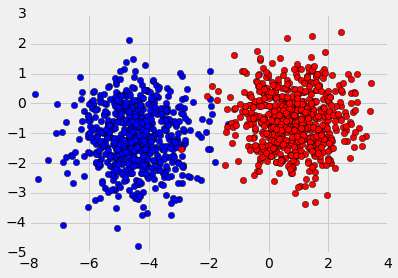

In [194]:
fig, ax = plt.subplots(1)
ax.plot(data[np.where(labels[:, 0]), 0], data[np.where(labels[:, 0]), 1], 'bo')
ax.plot(data[np.where(labels[:, 1]), 0], data[np.where(labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [88]:
fvecs, labels_onehot = extract_data(test_data_filename)

In [89]:
fvecs.shape

(200, 2)

In [204]:
from sklearn.cross_validation import train_test_split

In [218]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=1000)


In [224]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((1000, 2), (200, 2), (1000, 2), (200, 2))

In [222]:
def train_softmax(data, labels, train_size=1000,
                  num_labels=NUM_LABELS, batch_size=BATCH_SIZE,
                  num_epochs=NUM_EPOCHS):
    
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=train_size)
    train_size, num_features = train_data.shape

    # This is where training samples and labels are fed to the graph.
    # These placeholder nodes will be fed a batch of training data at each
    # training step using the {feed_dict} argument to the Run() call below.
    x = tf.placeholder("float", shape=[None, num_features])
    y_ = tf.placeholder("float", shape=[None, num_labels])

    # For the test data, hold the entire dataset in one constant node.
    test_data_node = tf.constant(test_data)

    # Define and initialize the network.

    # These are the weights that inform how much each feature contributes to
    # the classification.
    W = tf.Variable(tf.zeros([num_features, num_labels]))
    b = tf.Variable(tf.zeros([num_labels]))
    y = tf.nn.softmax(tf.matmul(x, W) + b)

    # Optimization.
    cross_entropy = -tf.reduce_sum(y_*tf.log(y))
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

    # Evaluation.
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    s = tf.Session()
    # Run all the initializers to prepare the trainable parameters.
    tf.initialize_all_variables().run(session=s)
    print 'Initialized!'
    print
    print 'Training.'

    # Iterate and train.
    for step in xrange(num_epochs * train_size // batch_size):
        print step,

        offset = (step * batch_size) % train_size
        batch_data = train_data[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size)]
        train_step.run(feed_dict={x: batch_data, y_: batch_labels}, session=s)

        if offset >= train_size-batch_size:
            print

    print
    print 'Weight matrix.'
    print s.run(W)
    print
    print 'Bias vector.'
    print s.run(b)
    print
    print "Applying model to first test instance."
    first = test_data[:1]
    print "Point =", first
    print "Wx+b = ", s.run(tf.matmul(first, W) + b)
    foo = tf.nn.softmax(tf.matmul(first, W) + b)
    print "softmax(Wx+b) = ", s.run(foo)
    print 

    print "Accuracy:", accuracy.eval(feed_dict={x: test_data, y_: test_labels}, session=s)
    return W, b, s

In [223]:
W, b, s = train_softmax(train_data_filename, test_data_filename)

ValueError: Found arrays with inconsistent numbers of samples: [30 31]

In [78]:
    y = tf.nn.softmax(tf.matmul(, W) + b)

NameError: name 'x' is not defined

In [64]:
test_data, test_labels = extract_data(test_data_filename)

In [ ]:
data, labels = extract_data(filename)
fig, ax = plt.subplots(1)
ax.plot(data[np.where(labels[:, 0]), 0], data[np.where(labels[:, 0]), 1], 'bo')
ax.plot(data[np.where(labels[:, 1]), 0], data[np.where(labels[:, 1]), 1], 'ro')
ax.set_aspect('equal')

In [71]:
tt = tf.nn.softmax(tf.matmul(test_data, W) + b)

In [70]:
np.round(tt.eval(session=s))

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.]], dtype=float32)

### The next set of data is not linearly separable:

In [192]:
#data, labels = generate_dataset(make_circles, train=1000, test=200, noise=0.2, factor=0.1)
data, labels = generate_dataset(make_moons, train=1000, test=200, noise=0.2)

### And softmax doesn't do great:

In [16]:
train_softmax(train_data_filename, test_data_filename)

Initialized!

Training.
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99

Weight matrix.
[[-0.61759889  0.61759949]
 [ 2.28220677 -2.28220725]]

Bias vector.
[-0.22157298  0.22157331]

Applying model to first test instance.
Point = [[-0.50056857  0.68710649]]
Wx+b =  [[ 1.65569663 -1.65569699]]
softmax(Wx+b) =  [[ 0.96481764  0.03518238]]

Accuracy: 0.861


## Another approach is a network with hidden layers

In [17]:
def init_weights(shape, init_method='xavier', xavier_params = (None, None)):
    if init_method == 'zeros':
        return tf.Variable(tf.zeros(shape, dtype=tf.float32))
    elif init_method == 'uniform':
        return tf.Variable(tf.random_normal(shape, stddev=0.01, dtype=tf.float32))
    else: #xavier
        (fan_in, fan_out) = xavier_params
        low = -4*np.sqrt(6.0/(fan_in + fan_out)) # {sigmoid:4, tanh:1} 
        high = 4*np.sqrt(6.0/(fan_in + fan_out))
        return tf.Variable(tf.random_uniform(shape, minval=low, maxval=high, dtype=tf.float32))
    

In [24]:
def train_hidden(train_data_filename, test_data_file_name, 
                  num_labels=NUM_LABELS, batch_size=BATCH_SIZE,
                  num_epochs=NUM_EPOCHS, num_hidden=NUM_HIDDEN):

    # Extract it into numpy arrays.
    train_data,train_labels = extract_data(train_data_filename)
    test_data, test_labels = extract_data(test_data_filename)

    # Get the shape of the training data.
    train_size,num_features = train_data.shape
    # Get the number of epochs for training.
    num_epochs = num_epochs
    # Get the size of layer one.
    num_hidden = num_hidden
    # This is where training samples and labels are fed to the graph.
    # These placeholder nodes will be fed a batch of training data at each
    # training step using the {feed_dict} argument to the Run() call below.
    x = tf.placeholder("float", shape=[None, num_features])
    y_ = tf.placeholder("float", shape=[None, num_labels])
    
    # For the test data, hold the entire dataset in one constant node.
    test_data_node = tf.constant(test_data)
    # Define and initialize the network.

    # Initialize the hidden weights and biases.
    w_hidden = init_weights(
        [num_features, num_hidden],
        'xavier',
        xavier_params=(num_features, num_hidden))

    b_hidden = init_weights([1,num_hidden],'zeros')

    # The hidden layer.
    hidden = tf.nn.tanh(tf.matmul(x,w_hidden) + b_hidden)

    # Initialize the output weights and biases.
    w_out = init_weights(
        [num_hidden, NUM_LABELS],
        'xavier',
        xavier_params=(num_hidden, num_labels))
    
    b_out = init_weights([1, num_labels],'zeros')

    # The output layer.
    y = tf.nn.softmax(tf.matmul(hidden, w_out) + b_out)
    
    # Optimization.
    cross_entropy = -tf.reduce_sum(y_*tf.log(y))
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
    
    # Evaluation.
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    # Create a local session to run this computation.
    with tf.Session() as s:
        # Run all the initializers to prepare the trainable parameters.
        tf.initialize_all_variables().run()
        print 'Initialized!'
        print
        print 'Training.'
        # Iterate and train.
        for step in xrange(num_epochs * train_size // batch_size):
            print step,
            offset = (step * batch_size) % train_size
            batch_data = train_data[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size)]
            train_step.run(feed_dict={x: batch_data, y_: batch_labels})
            if offset >= train_size - batch_size:
                print
        print "Accuracy:", accuracy.eval(feed_dict={x: test_data, y_: test_labels})

In [25]:
train_hidden(train_data_filename, test_data_filename)

Initialized!

Training.
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79
80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
Accuracy: 0.958


In [29]:
one = tf.constant(1)

In [33]:
one.eval(session=sess)

1